# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

 # <h1 style='background:#51C4D3; border:0; color:white'><center>FETAL HEALTH</center></h1> 

### 1. BUSINESS CASE ( UNDERSTANDING ) : 

1 :  Detection of fetal health - To understand early detection of fetal distress and thus it helps to take action to prevent child and maternal mortality

2 : Data from CTG (Cardiotocograph) used to monitor a baby's heart rate and a mother's contractions during pregnancy. its interpretation helps whether the pregnancy is high or low risk.

3 : Raw Data - https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls    

4.1 : We would perform Exploratory Data Analysis to understand data.<br>
4.2 : Find out key features influencing fetel health.<br>
4.3 : Using the predictor features  we are building a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus. 

In [89]:
# Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import urllib


np.random.seed(0)

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [90]:
import urllib
dls = "https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls"
urllib.request.urlretrieve(dls, "FetalHealthRawData.csv")

('FetalHealthRawData.csv', <http.client.HTTPMessage at 0x1de33fb3670>)

from urllib.request import urlopen
html = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls").read()
print(html)

## 2.2 Code for converting the above downloaded data into a dataframe

In [91]:
# Printing the Raw Data excel sheet records from the downloaded workbook.

df_raw = pd.read_excel('FetalHealthRawData.csv', sheet_name='Raw Data')
df_raw

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [92]:
# Understanding data looking at top 5 rows.
df_raw.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [93]:
# To Do the cleaning
df = df_raw 

In [94]:
# Dropping unwanted columns

df = df.drop(['FileName','Date','SegFile','b','e', 'LBE', 'DR', 'A', 'B', 'C', 'D', 'E', 'DE', 'AD', 'FS', 'LD', 'SUSP', 'CLASS'], axis=1)
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'NSP'],
      dtype='object')

In [95]:
len(df.columns)

22

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [96]:
print("\033[1m" + "DATA DESCRIPTION (FEATURES) & DATA TYPE INFORMATION :-\n" + "\033[0m")
df.info();

DATA DESCRIPTION (FEATURES) & DATA TYPE INFORMATION :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  212

In [97]:
print("\033[1m" + "STATISTICAL INFORMATION :-\n" + "\033[0m")
df.describe().T

STATISTICAL INFORMATION :-



,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.0,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.0,91.0
MLTV,2127.0,8.207616,5.701926,0.0,4.6,7.4,10.8,50.7
DL,2128.0,1.576128,2.517794,0.0,0.0,0.0,3.0,16.0
DS,2128.0,0.003759,0.061213,0.0,0.0,0.0,0.0,1.0


In [98]:
print("\033[1m" + "CHECKING NULL DATA COUNT :-\n" + "\033[0m")
df.isnull().sum()

CHECKING NULL DATA COUNT :-



LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
NSP         4
dtype: int64

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

1. There are 2126 records, each with 21 features & 1 class. The amount of disc space used is approximately 1.5mb.
2. 21 numerical features and 1 categorical feature (later converted to numerical feature).
3. There were 4 records with NaN/null values in the records (refer section 3).

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [99]:
# Checking for Duplicate Data

duplicate = df[df.duplicated()]
print("\033[1m" + "DUPLICATE ROWS :-",len(duplicate.index), "\033[0m")

DUPLICATE ROWS :- 15 


In [100]:
duplicate.head(len(duplicate.index))

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
69,140.0,5.0,0.0,3.0,34.0,1.2,0.0,10.3,0.0,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
235,123.0,0.0,0.0,0.0,49.0,0.8,7.0,13.8,0.0,0.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
307,145.0,0.0,13.0,0.0,77.0,0.2,45.0,5.8,0.0,0.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
320,150.0,0.0,10.0,0.0,79.0,0.2,84.0,2.8,0.0,0.0,...,147.0,152.0,1.0,0.0,150.0,149.0,151.0,0.0,0.0,3.0
325,135.0,0.0,0.0,0.0,62.0,0.5,71.0,6.9,0.0,0.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
334,144.0,0.0,15.0,0.0,76.0,0.4,61.0,10.6,0.0,0.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
788,123.0,3.0,4.0,0.0,52.0,0.8,2.0,15.4,0.0,0.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
792,123.0,2.0,3.0,0.0,50.0,0.9,4.0,14.8,0.0,0.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
799,146.0,0.0,0.0,4.0,65.0,0.4,39.0,7.0,0.0,0.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
850,138.0,2.0,0.0,4.0,41.0,0.8,8.0,10.3,0.0,0.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0


In [101]:
# Checking for Missing Data

df.loc[:, df.isnull().any()].columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'NSP'],
      dtype='object')

## Checking for data inconsistencies

In [102]:
# Get list of duplicate columns
def getDuplicateColumns(df):
 
    # Create an empty set
    duplicateColumnNames = set()
 
    # Iterate through all the columns
    # of dataframe
    for x in range(df.shape[1]):
 
        # Take column at xth index.
        col = df.iloc[:, x]
 
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
 
            # Take column at yth index.
            otherCol = df.iloc[:, y]
 
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[x])
 
    # Return list of unique column names
    # whose contents are duplicates.
    return list(duplicateColumnNames)

duplicateColNames = getDuplicateColumns(df)

    
for column in duplicateColNames:
    print('Column Name : ', column)

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [103]:
# Dropping duplicate column
df.drop(duplicateColNames, axis=1)

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2126,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# Removing duplicate data
display(df.drop_duplicates())

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2126,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Removing records with missing data
df_records_dropped = df.dropna(axis=0, how='all')
df_records_dropped.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 1 to 2129
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [106]:
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2126,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>To impute or remove missing data</b> - After dropping the duplicate records & NaN records, the remaining data is clean and doesnt require any imputation.

In [107]:
df.isnull().sum()

LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
NSP         4
dtype: int64

In [108]:
# Dropping NaN columns
df.dropna(inplace=True)

## Transforming Data Labels

In [109]:
#Creating dictionary for labels

label_dict = {
  "LB": "baseline_val",
  "AC": "accelerations",
  "FM": "fetal_movement",
  "UC": "uterine_contractions",
  "ASTV": "abnormal_st_var",
  "ALTV": "perc_abnormal_lt_var",
  "MLTV": "mean_lt_var",
  "DL": "light_dcls",
  "DS": "severe_dcls",
  "DP": "prol_dcls",
  "Width": "hist_width",
  "Min": "hist_min",
  "Max": "hist_max",
  "Nmax": "hist_num_peaks",
  "Nzeros": "hist_num_zeroes",
  "Mode": "hist_mode",
  "Mean": "hist_mean",
  "Median": "hist_median",
  "Variance": "hist_variance",
  "Tendency": "hist_tendency",
  "NSP": "fetal_health",
  "MSTV" : "mean_st_var"
}

In [110]:
df.rename(columns=label_dict,inplace=True)
df

,baseline_val,accelerations,fetal_movement,uterine_contractions,abnormal_st_var,mean_st_var,perc_abnormal_lt_var,mean_lt_var,light_dcls,severe_dcls,...,hist_min,hist_max,hist_num_peaks,hist_num_zeroes,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,fetal_health
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## 3.3 Encode categorical data

## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

<b>To remove duplicate data </b> - We used Pandas DataFrame duplicated() Method to identify & drop_duplicates method to remove duplicate data.

<b>To impute or remove missing data </b> - After dropping the duplicate records & NaN records, the remaining data is clean and doesnt require any imputation.

<b>To remove data inconsistencies </b> - We identified Duplicate Columns in the dataset and dropped the same using custom logic in getDuplicateColumns().


## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [111]:
y=df[["fetal_health"]] 
y['fetal_health'].unique()

array([2., 1., 3.])

In [112]:
# Separate the class variable from the dataframe. We will extract the class variable to a different dataframe
x=df.drop("fetal_health",axis=1)
x.head()

,baseline_val,accelerations,fetal_movement,uterine_contractions,abnormal_st_var,mean_st_var,perc_abnormal_lt_var,mean_lt_var,light_dcls,severe_dcls,...,hist_width,hist_min,hist_max,hist_num_peaks,hist_num_zeroes,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


Check the distribution of the classes in the dataframe

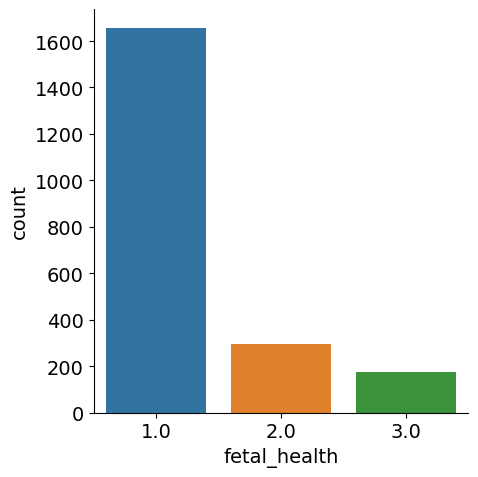

In [113]:
sns.catplot(x="fetal_health",data=df,kind='count');

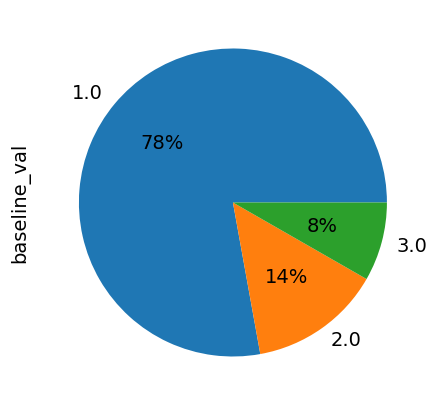

In [114]:
df.groupby(['fetal_health']).count()

fetal_healthfig, ax = plt.subplots(figsize=(5,5))
df.groupby(['fetal_health']).count().plot(
    kind='pie', y='baseline_val', autopct='%1.0f%%', ax=ax, legend=False);

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

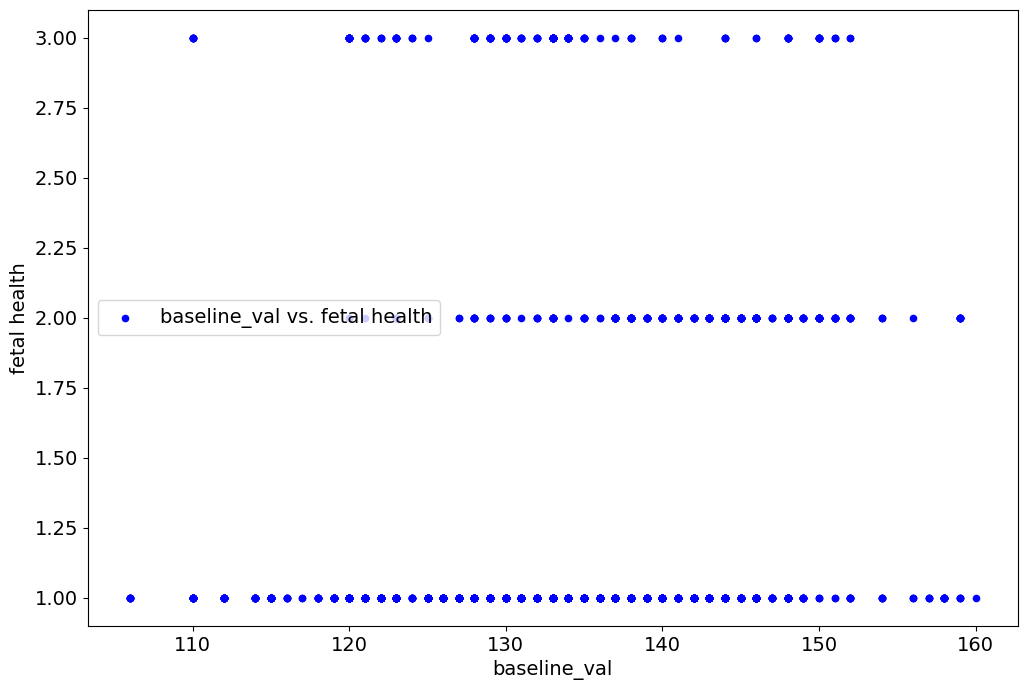

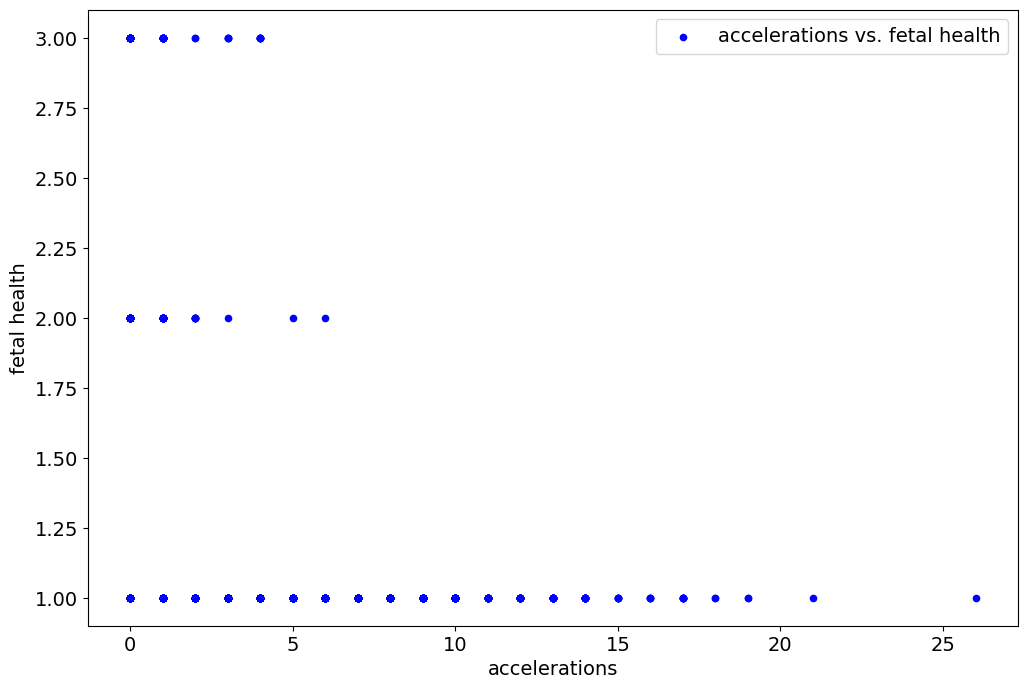

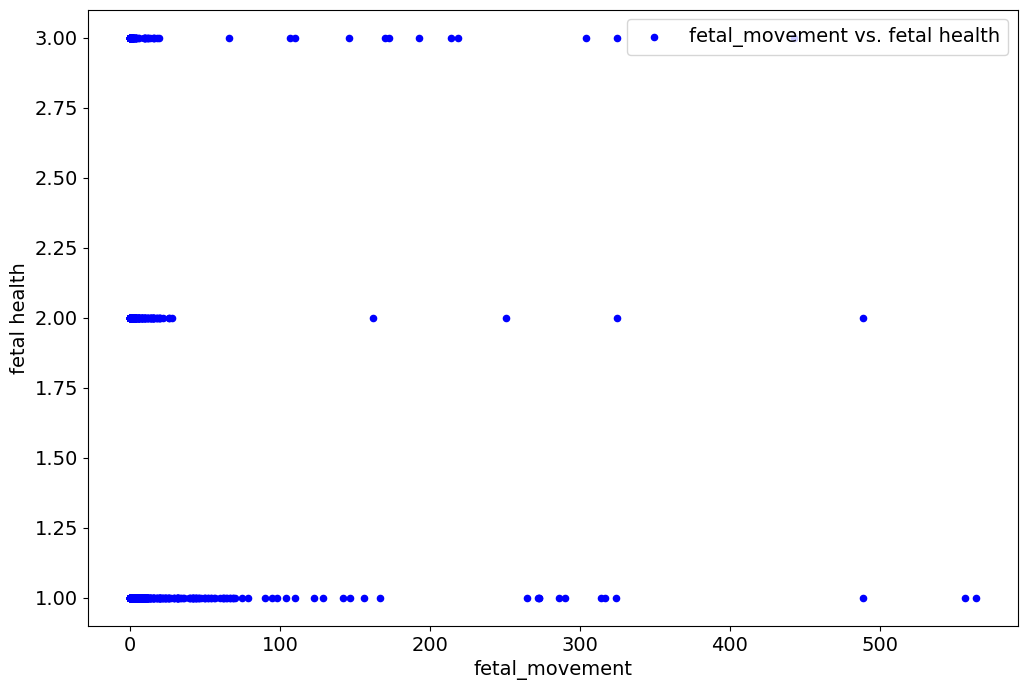

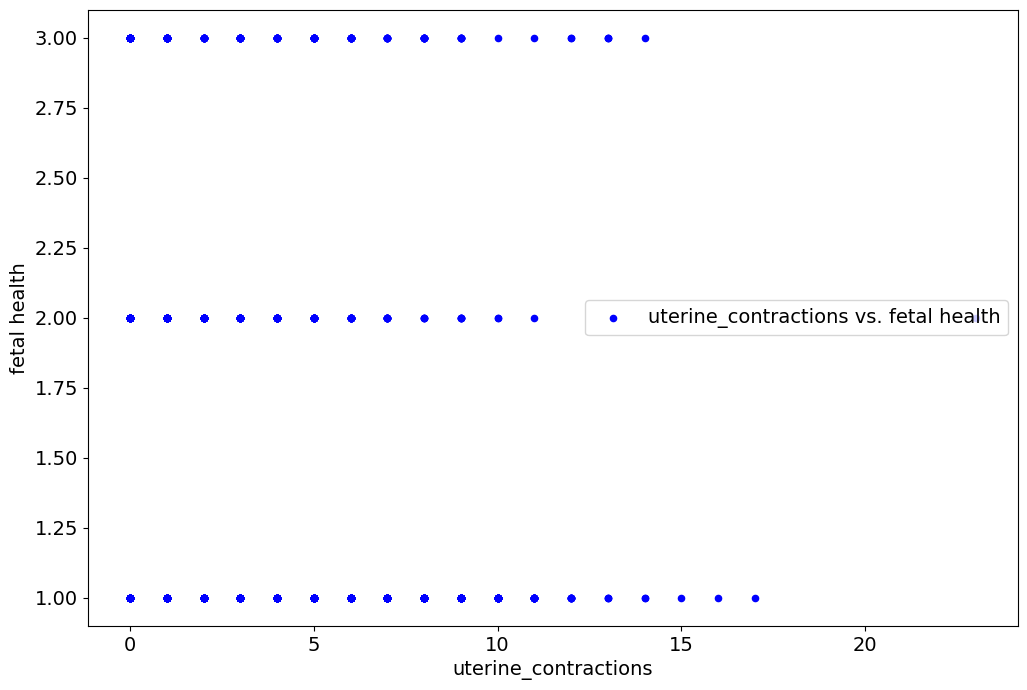

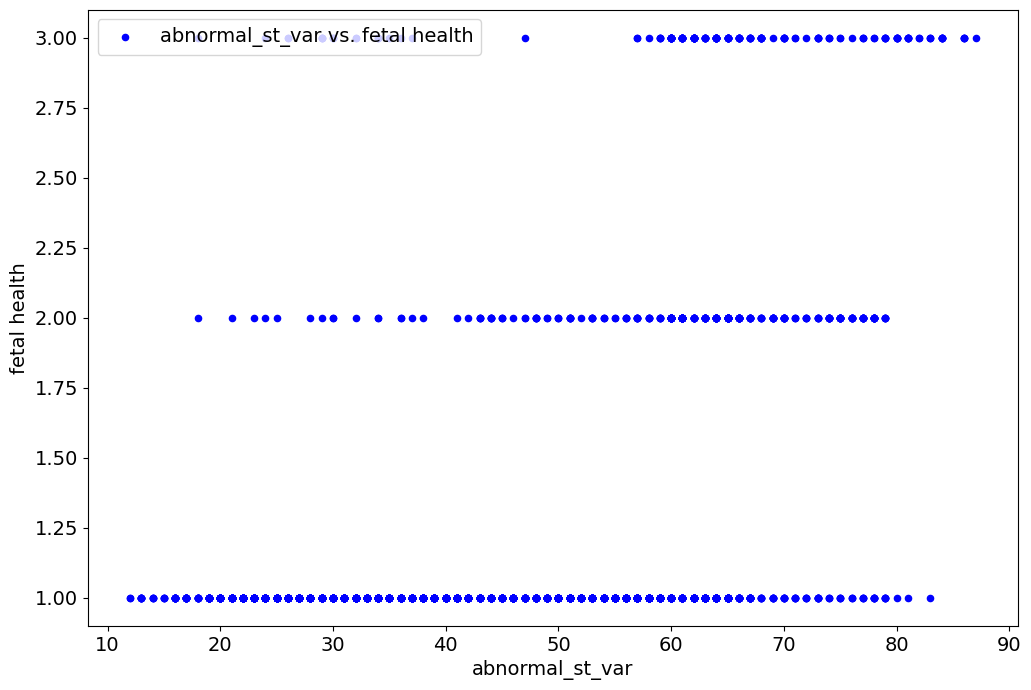

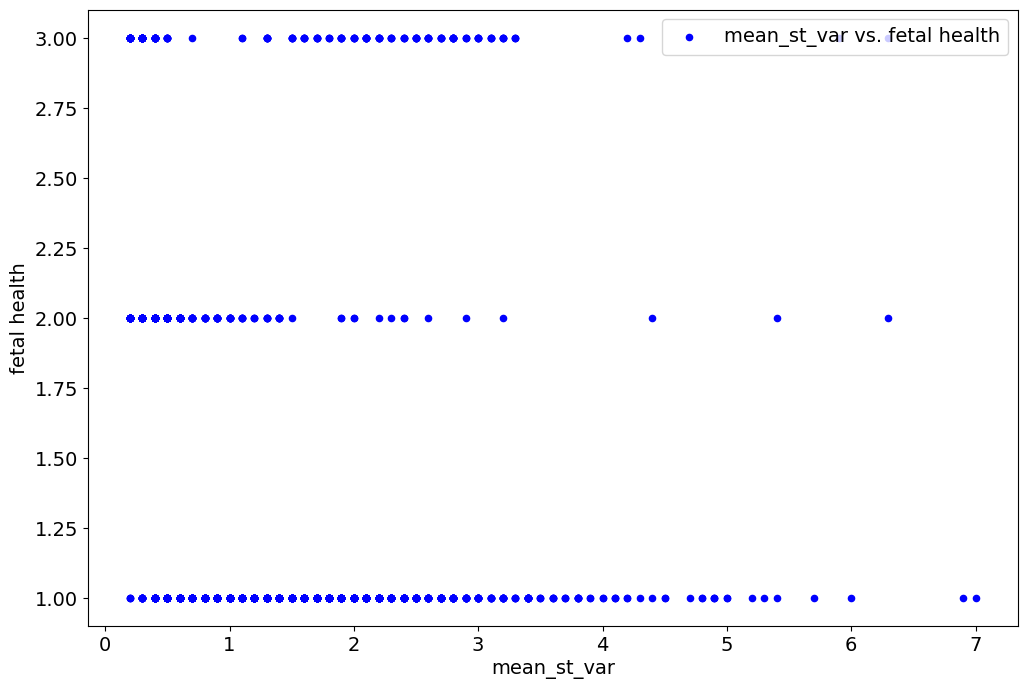

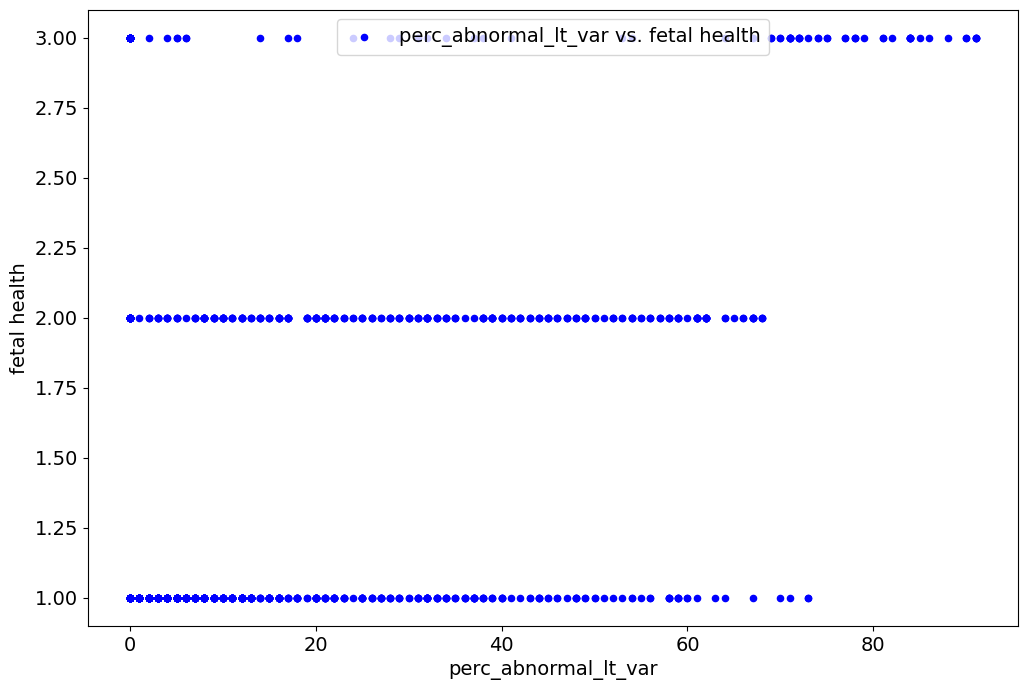

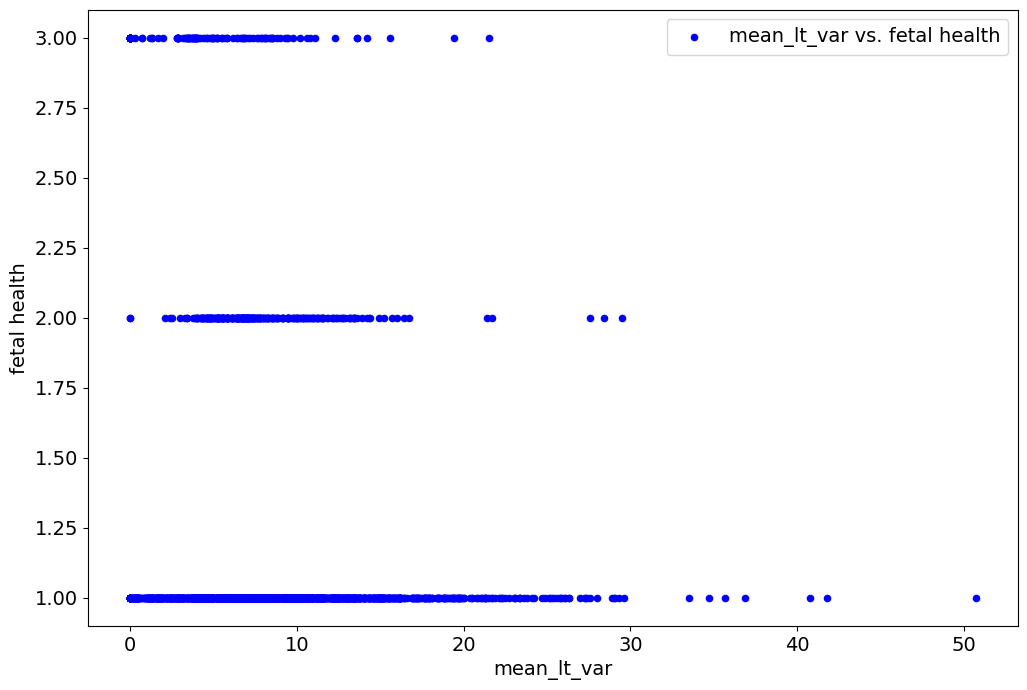

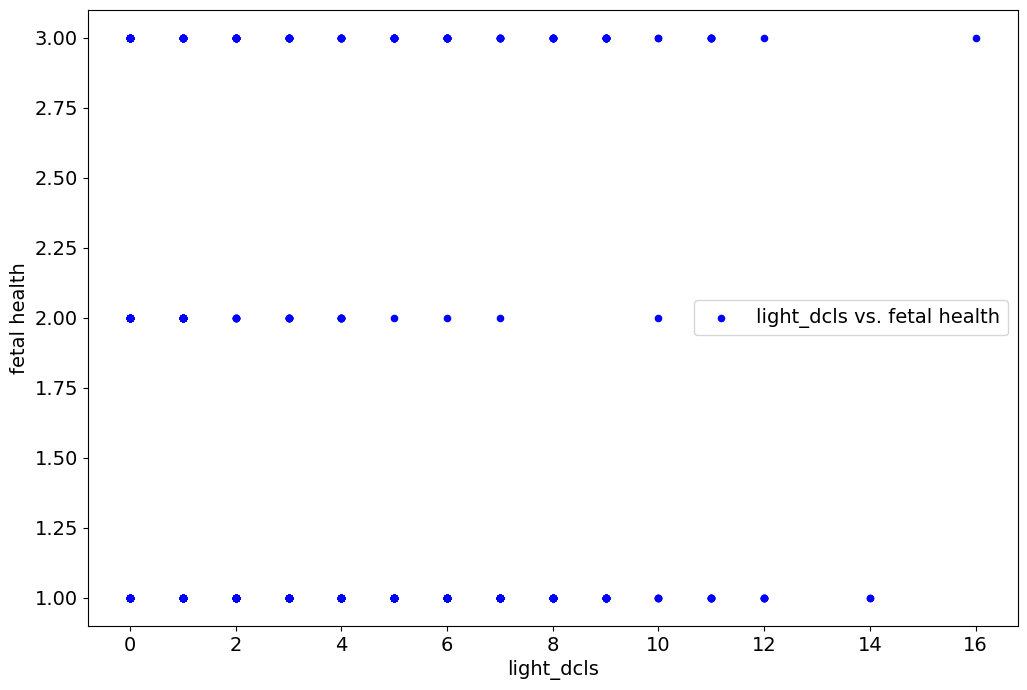

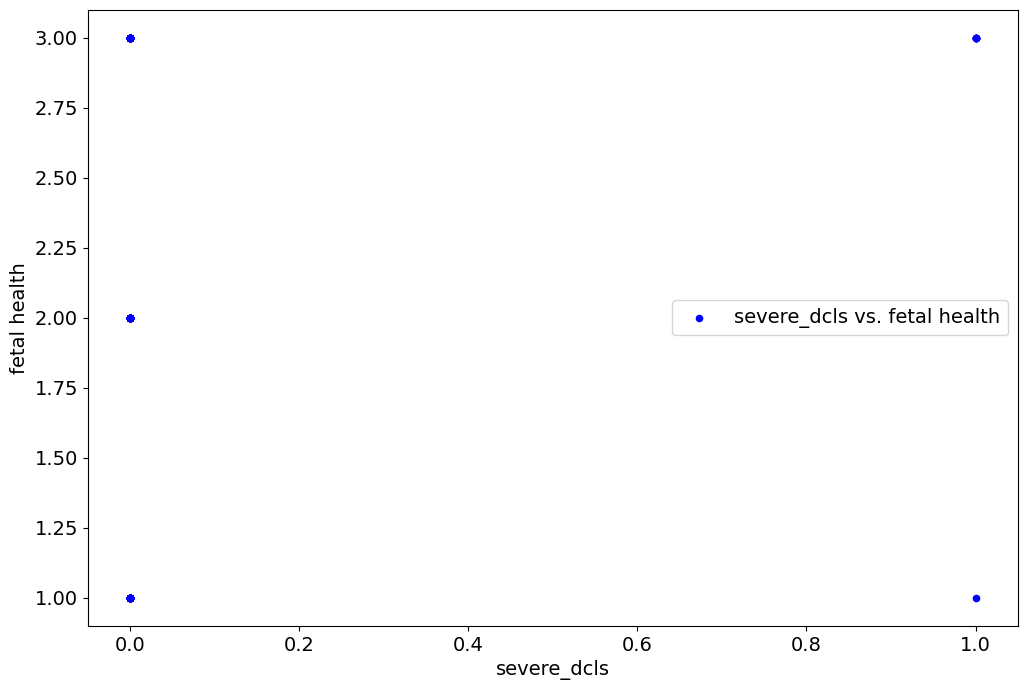

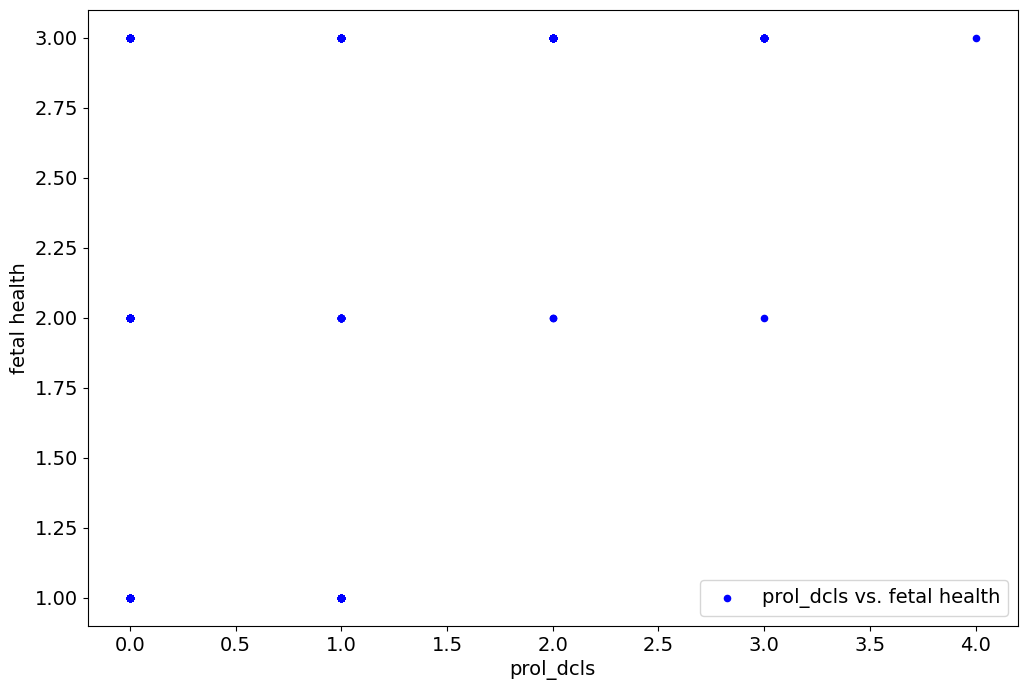

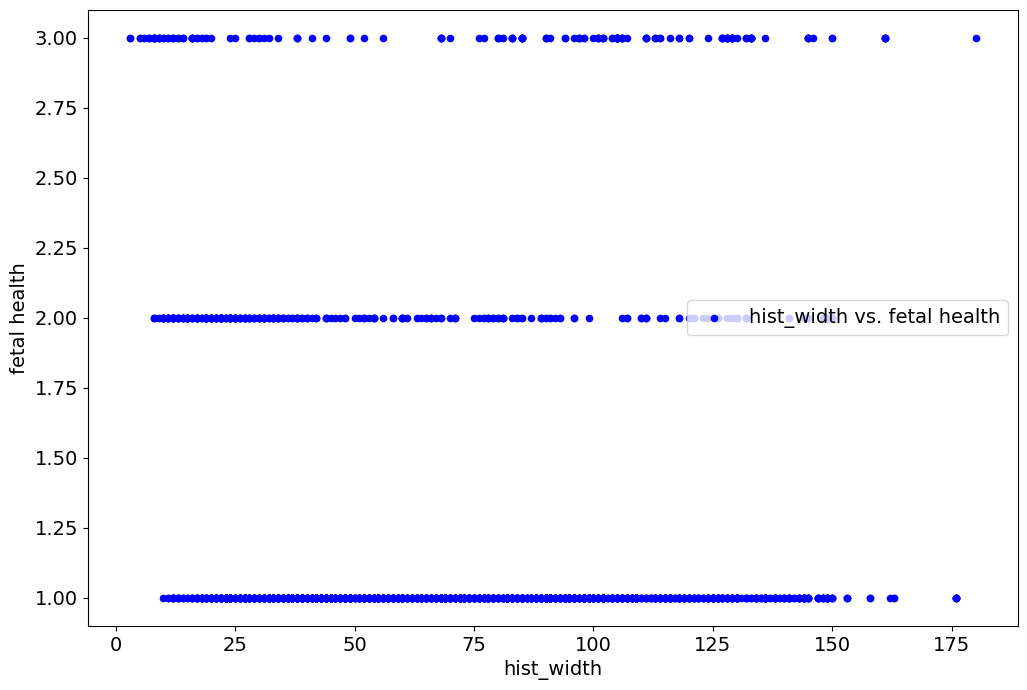

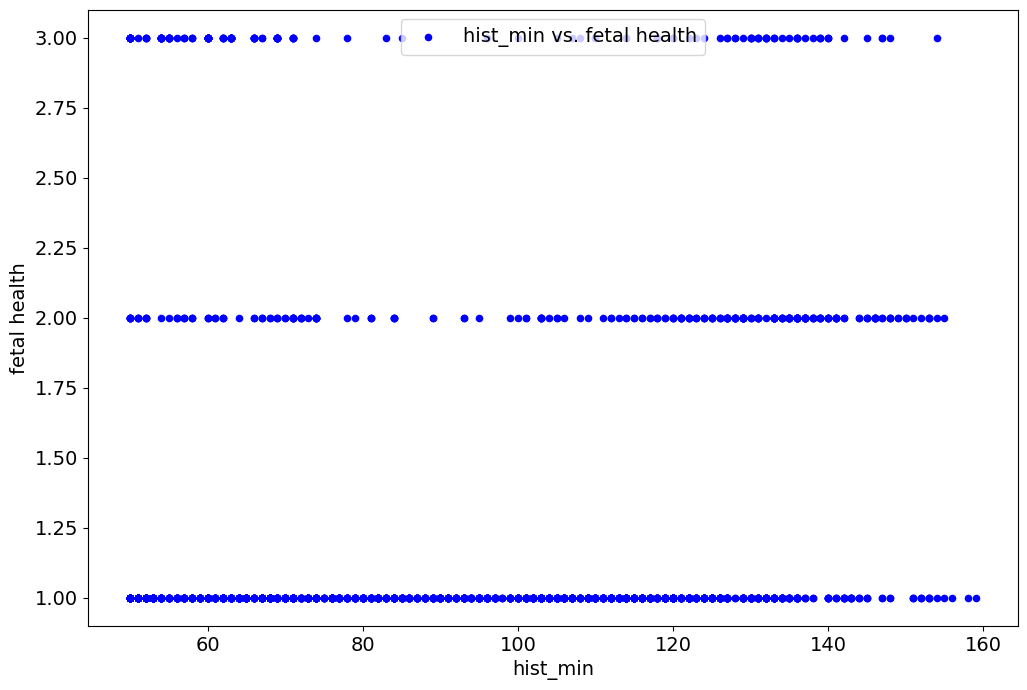

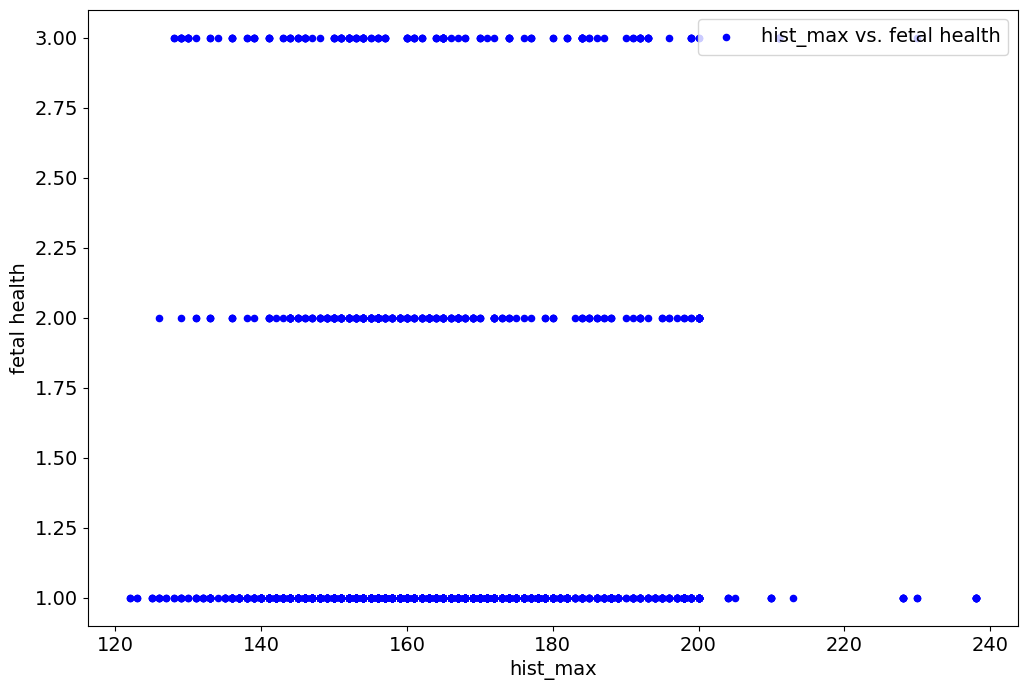

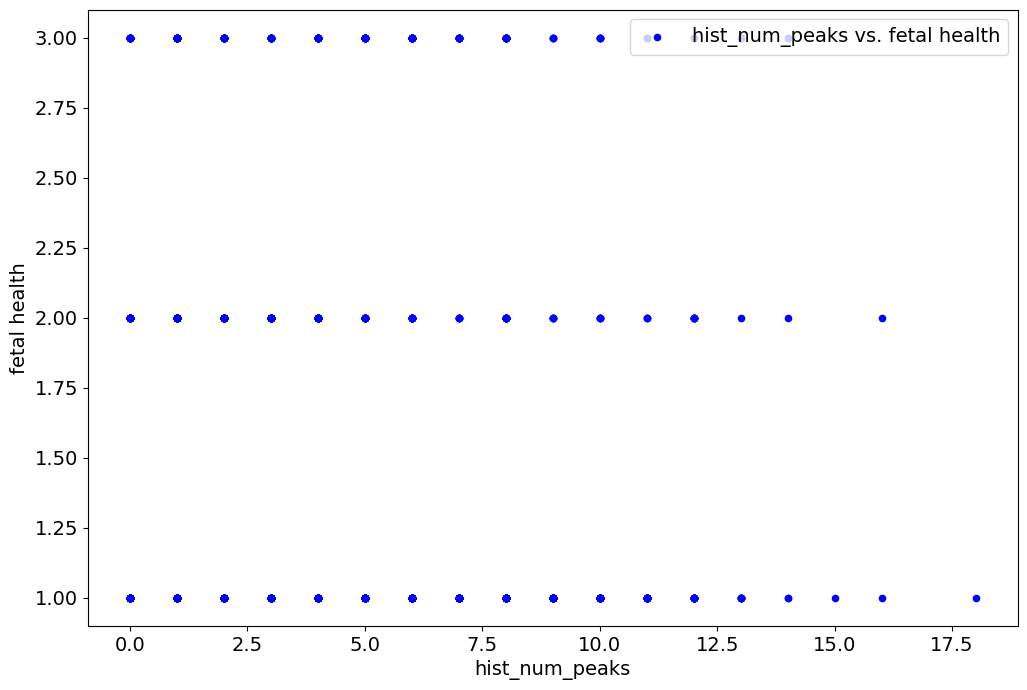

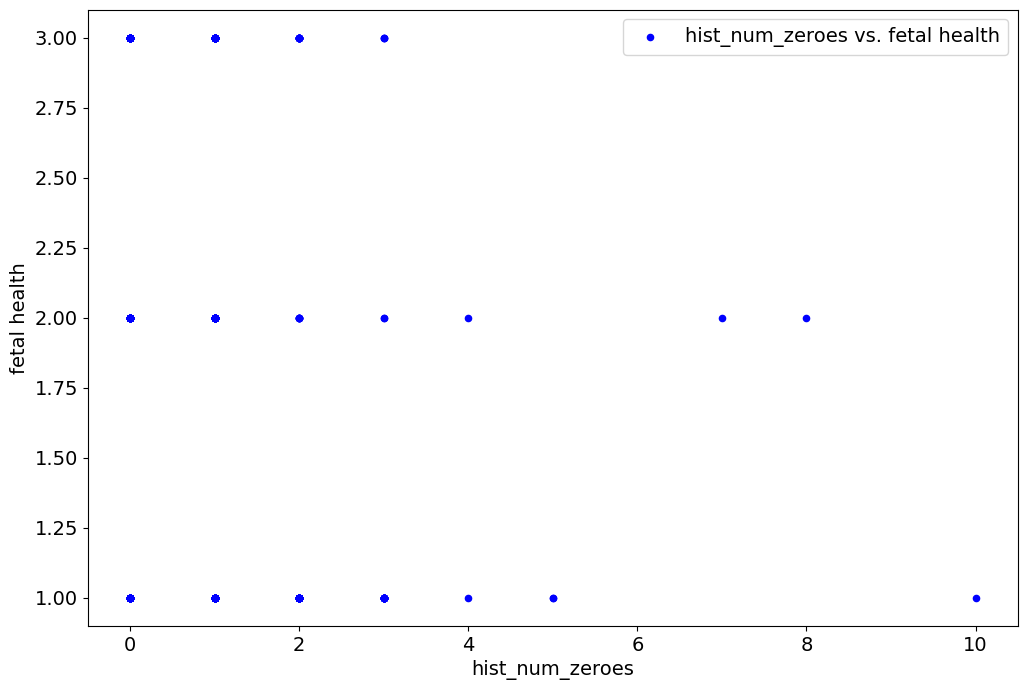

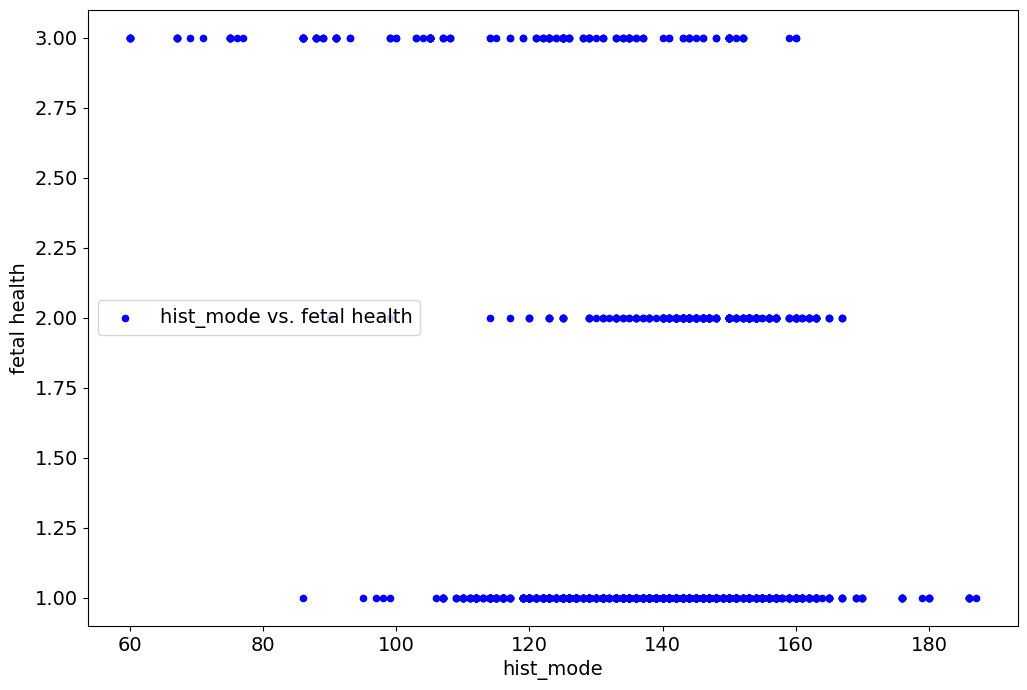

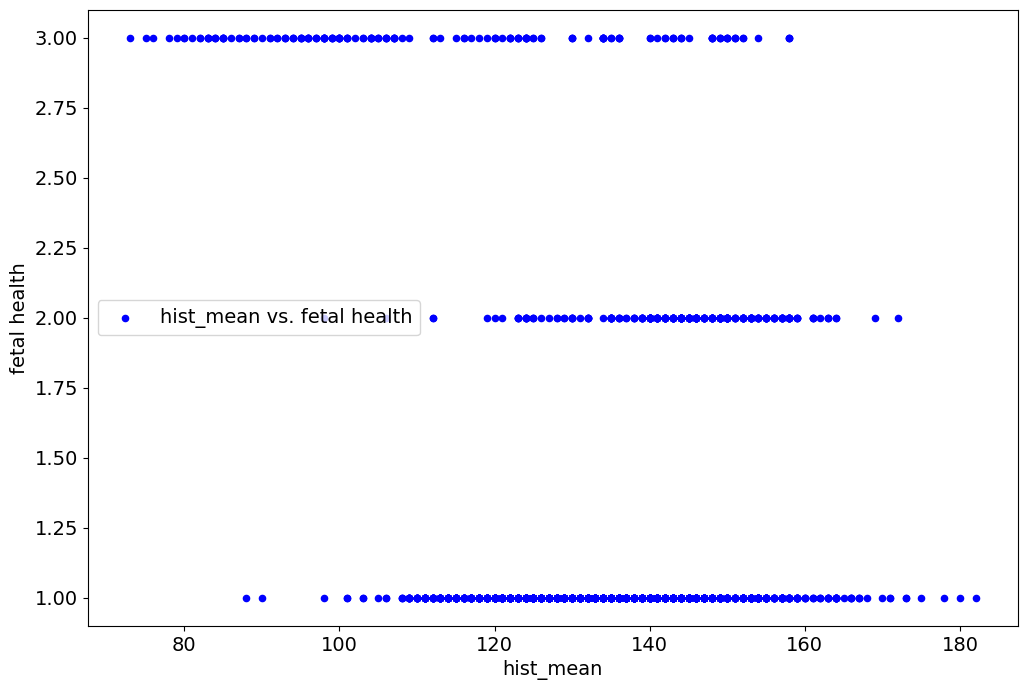

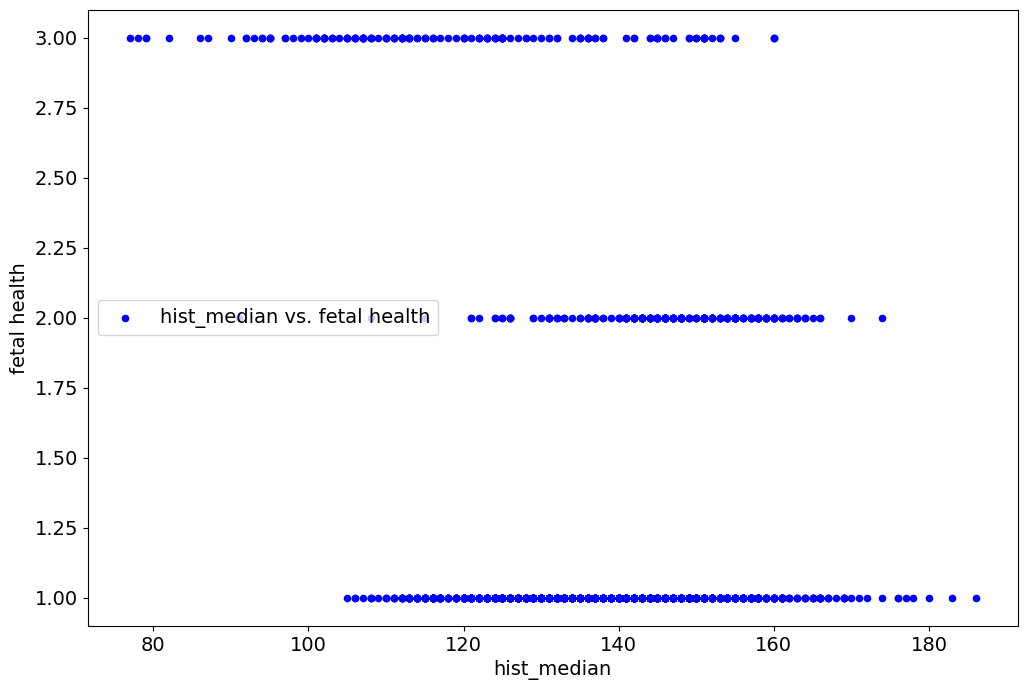

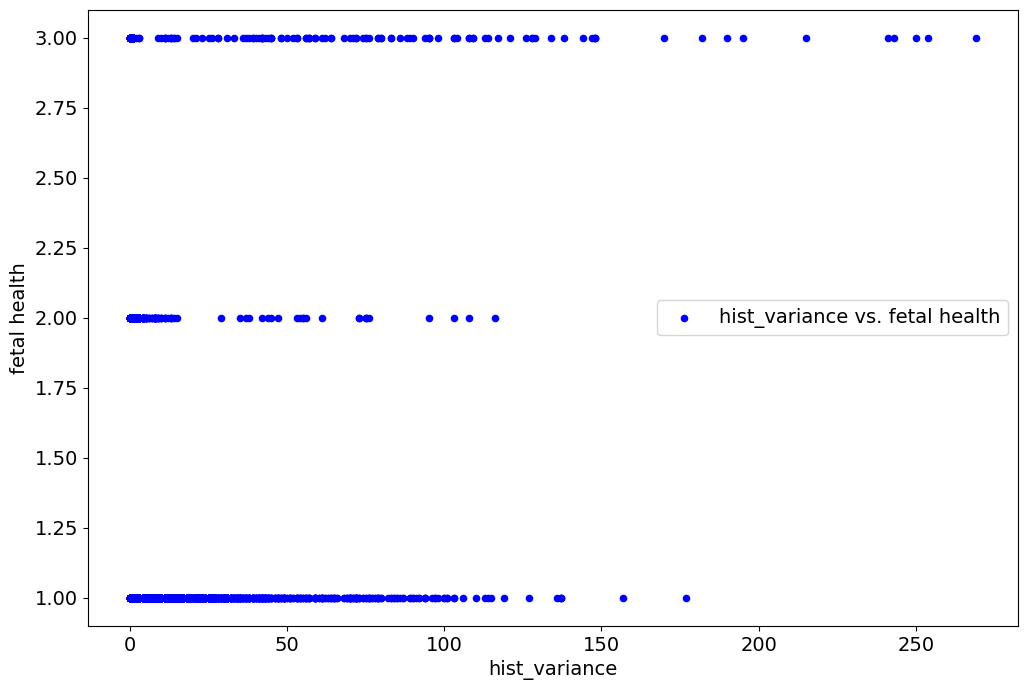

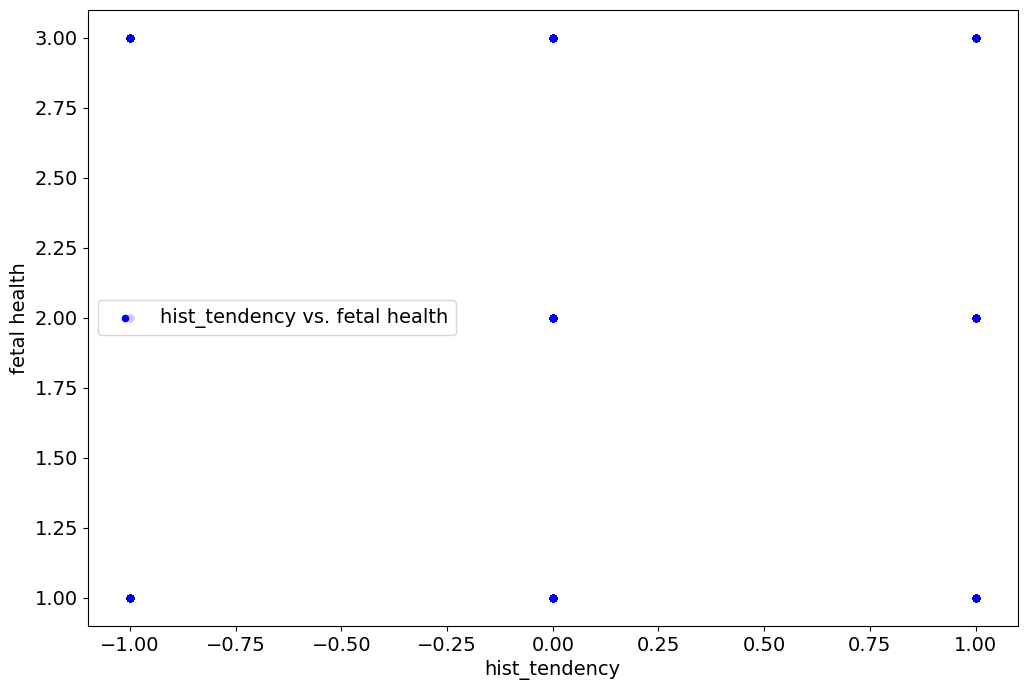

In [115]:
for col in x.columns:
    ax = df.plot(kind="scatter", x=col,y="fetal_health", color="b", label=col+" vs. fetal health")
    ax.set_xlabel(col)
    ax.set_ylabel("fetal health")
    plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [116]:
correlation=df.corr()

<AxesSubplot: >

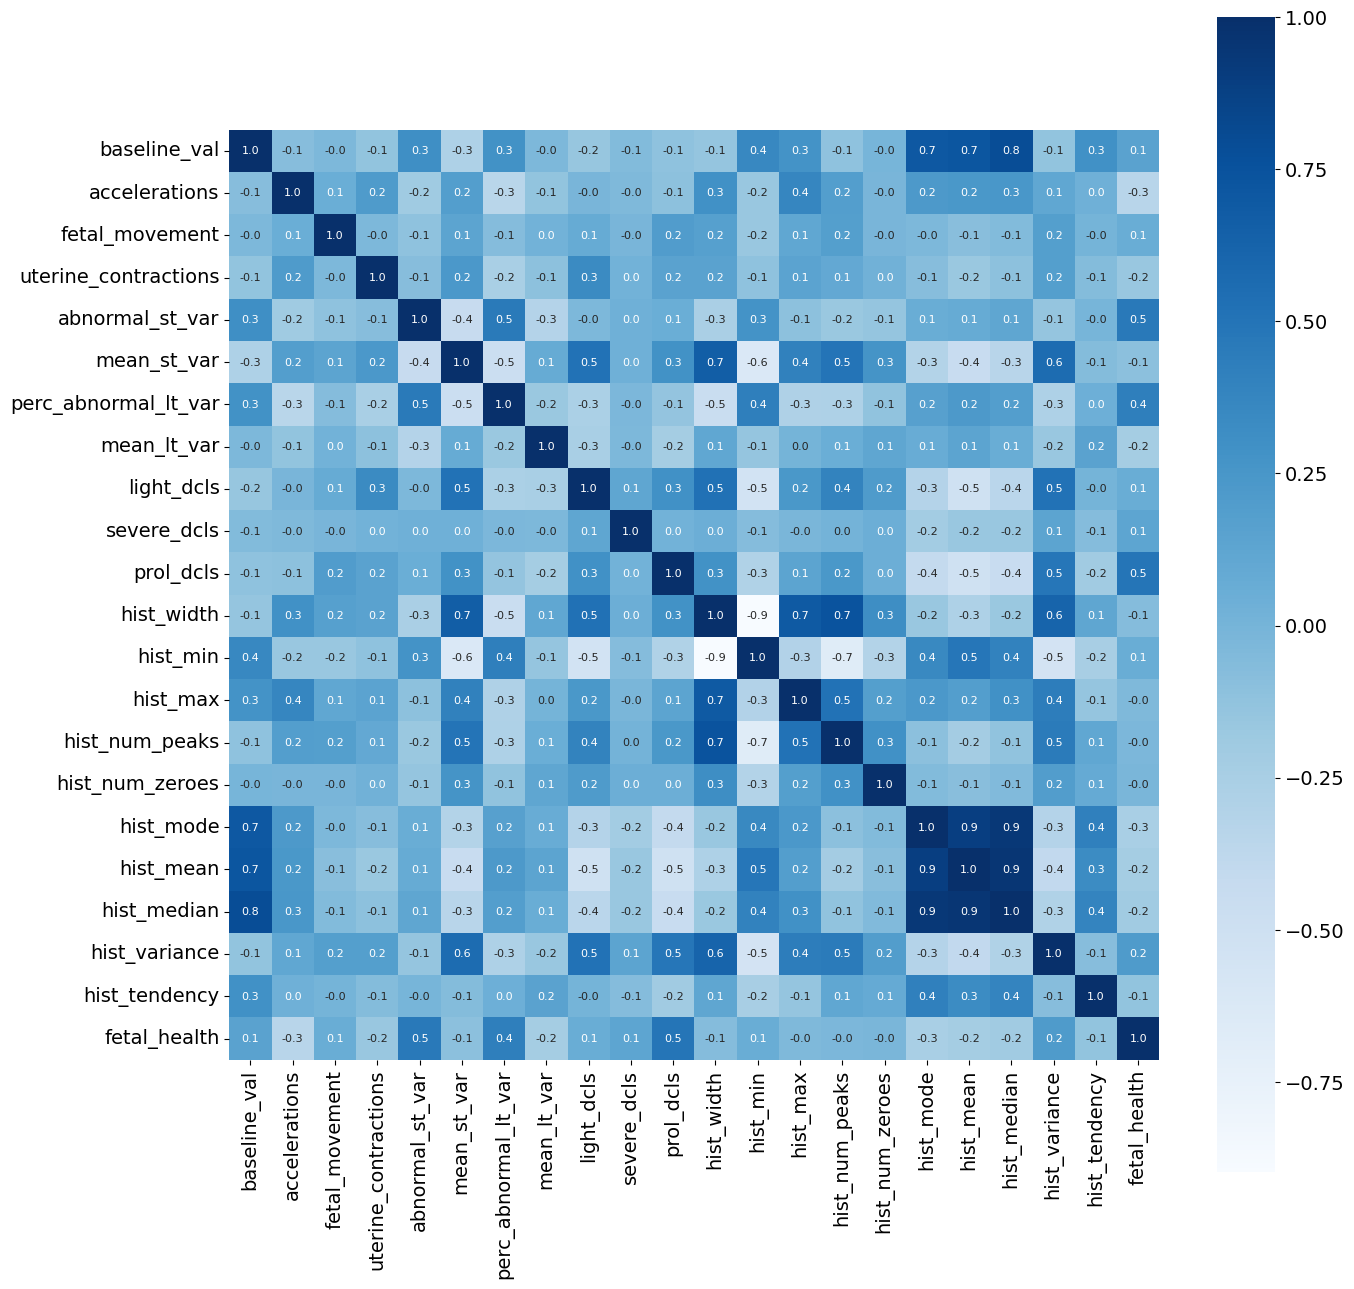

In [117]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

<AxesSubplot: title={'center': 'Correlation with Response variable'}>

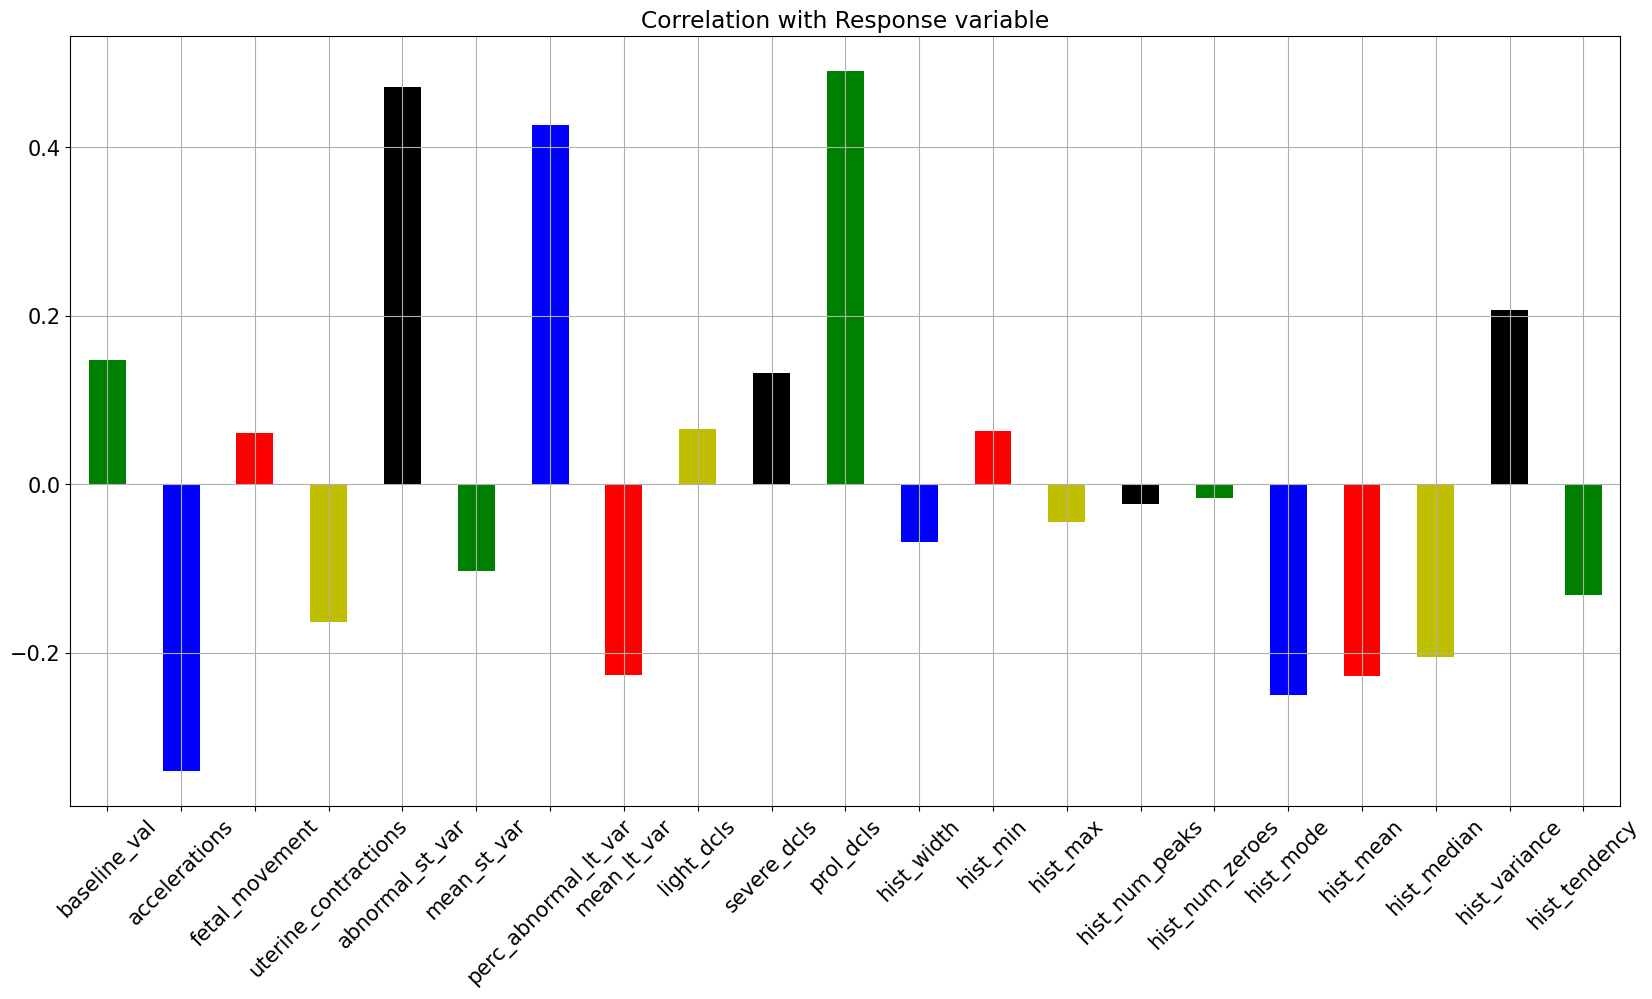

In [118]:
## Correlation with Response Variable
color=tuple(["g", "b","r","y","k"])
x.corrwith(df.fetal_health).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True,color=color)

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

#### Identifying feature importance using Mutual Information (Information Gain)

mean_st_var             0.199146
perc_abnormal_lt_var    0.194981
abnormal_st_var         0.185761
hist_mean               0.161195
hist_mode               0.155615
baseline_val            0.149227
accelerations           0.148311
hist_variance           0.142328
hist_median             0.133169
hist_width              0.127800
hist_min                0.124659
prol_dcls               0.083779
hist_max                0.073708
mean_lt_var             0.073387
uterine_contractions    0.050071
hist_tendency           0.039529
fetal_movement          0.031478
light_dcls              0.027730
hist_num_peaks          0.021887
severe_dcls             0.000000
hist_num_zeroes         0.000000
dtype: float64


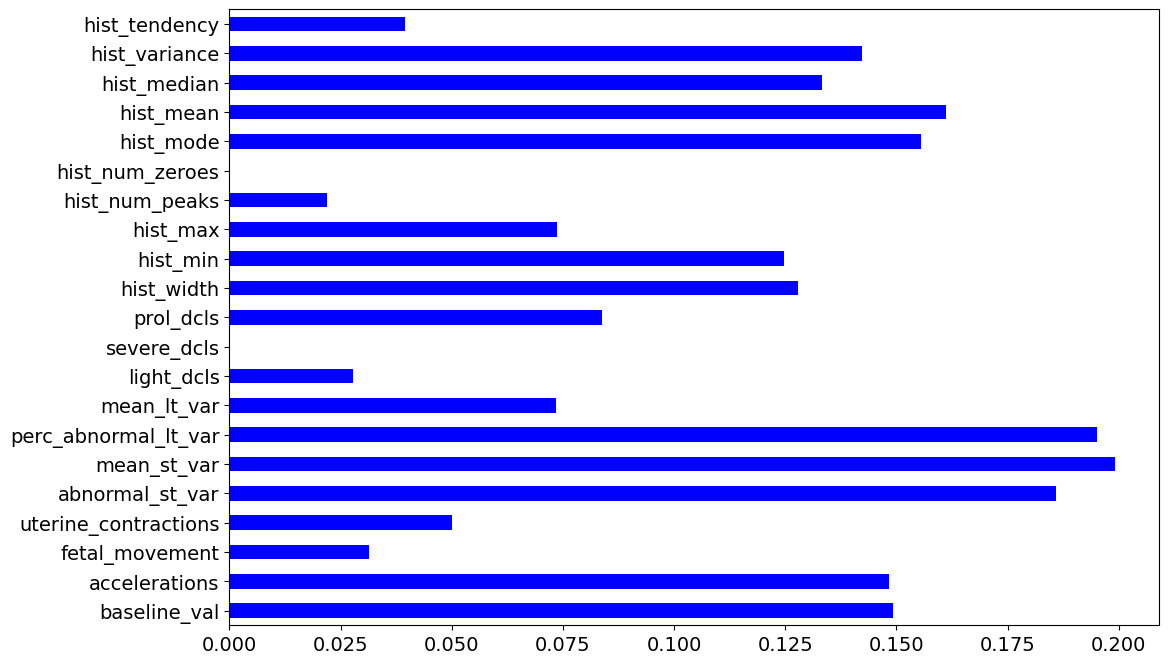

In [119]:
from sklearn.feature_selection import mutual_info_classif 

importances = mutual_info_classif(x,y['fetal_health'])
feat_importances = pd.Series(importances, x.columns)
feat_importances.plot(kind='barh', color='blue')

print(feat_importances.sort_values(ascending=False))

In [120]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=15)
z = fs.fit_transform(x,y['fetal_health'])
print(z.shape)
print(df.shape)

important_features = [val for i,val in enumerate(x.columns) if fs.get_support()[i]]
print(important_features)

(2126, 15)
(2126, 22)
['baseline_val', 'accelerations', 'uterine_contractions', 'abnormal_st_var', 'mean_st_var', 'perc_abnormal_lt_var', 'mean_lt_var', 'light_dcls', 'prol_dcls', 'hist_width', 'hist_min', 'hist_mode', 'hist_mean', 'hist_median', 'hist_variance']


In [121]:
## Selecting features with higher correlation with target varaible

x = x[["mean_st_var","perc_abnormal_lt_var","abnormal_st_var","hist_mean","hist_mode","baseline_val","accelerations","hist_variance","hist_median","hist_width","hist_min","prol_dcls","hist_max","mean_lt_var"]]

#### Identifying feature importance using Gini index

The sklearn RandomForestClassifier uses a method called Gini Importance.

In [122]:
clf = RandomForestClassifier(1000)
importance =  clf.fit(x, y["fetal_health"])

<BarContainer object of 14 artists>

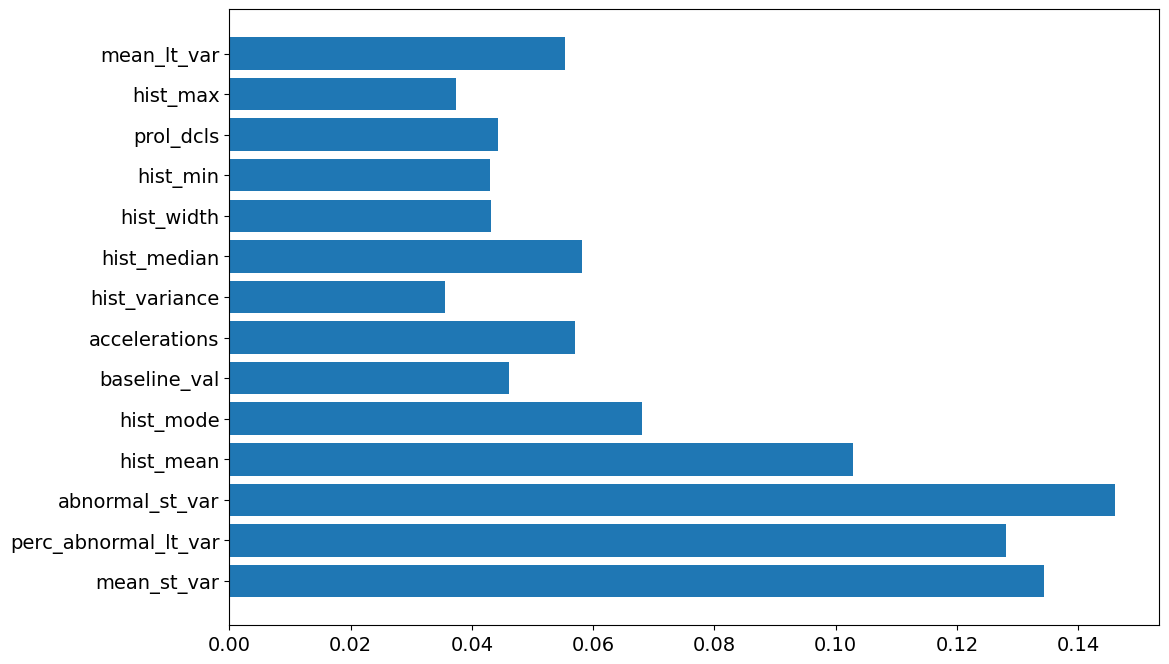

In [123]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(x.columns, clf.feature_importances_)

## 5.2 Report observations
0
Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [124]:
scaler=StandardScaler()

In [125]:
scaler.fit(x)

StandardScaler()

In [126]:
standardized=scaler.transform(x)  

In [127]:
print(standardized)

[[-0.94309501  1.80254152  1.51319018 ... -0.27153003 -2.11959194
  -1.02856029]
 [ 0.8688406  -0.53536128 -1.74475094 ... -0.27153003  1.89379439
   0.39317594]
 [ 0.8688406  -0.53536128 -1.80292846 ... -0.27153003  1.89379439
   0.92632703]
 ...
 [-1.05634099  0.55203537  1.8622553  ... -0.27153003  0.33303304
  -0.37100729]
 [-1.05634099  0.9326242   1.80407778 ... -0.27153003  0.27729156
  -0.21106196]
 [-1.05634099  1.42195269  1.5713677  ... -0.27153003 -0.28012321
  -0.56649602]]


In [128]:
x_stand = standardized

In [129]:
print(x)
print(y)

      mean_st_var  perc_abnormal_lt_var  abnormal_st_var  hist_mean  \
1             0.5                  43.0             73.0      137.0   
2             2.1                   0.0             17.0      136.0   
3             2.1                   0.0             16.0      135.0   
4             2.4                   0.0             16.0      134.0   
5             2.4                   0.0             16.0      136.0   
...           ...                   ...              ...        ...   
2122          0.2                  25.0             79.0      150.0   
2123          0.4                  22.0             78.0      148.0   
2124          0.4                  20.0             79.0      148.0   
2125          0.4                  27.0             78.0      147.0   
2126          0.4                  36.0             74.0      143.0   

      hist_mode  baseline_val  accelerations  hist_variance  hist_median  \
1         120.0         120.0            0.0           73.0        121.

train test split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [131]:
print(x.shape, x_train.shape, x_test.shape)

(2126, 14) (1700, 14) (426, 14)


In [132]:
classifier = svm.SVC(kernel='linear')

In [133]:
classifier.fit(x_train,y_train["fetal_health"])

SVC(kernel='linear')

# MODEL EVALUATION : 


<b>Accuracy Score :</b>

In [134]:
sv_x_train_prediction=classifier.predict(x_train)
sv_train_da=accuracy_score(sv_x_train_prediction,y_train)

In [135]:
print("TRAINING DATA ACCURACY:",sv_train_da)

TRAINING DATA ACCURACY: 0.9029411764705882


In [136]:
sv_x_test_prediction=classifier.predict(x_test)
sv_test_da=accuracy_score(sv_x_test_prediction,y_test)

In [137]:
print("TESTING DATA ACCURACY :",sv_test_da)

TESTING DATA ACCURACY : 0.8732394366197183


## 6.2 ML technique 2 + Justification

LOGISTIC REGRESSION :

In [138]:
print(x.shape, x_train.shape, x_test.shape)

(2126, 14) (1700, 14) (426, 14)


In [139]:
print(y.shape, y_train.shape, y_test.shape)

(2126, 1) (1700, 1) (426, 1)


In [140]:
lr_x_train=x_train
lr_x_test=x_test
lr_y_train=y_train
lr_y_test=y_test

In [141]:
def print_score(clf, lr_x_train, lr_y_train, lr_x_test, lr_y_test, train=True):
    if train:
        pred = clf.predict(lr_x_train)
        clf_report = pd.DataFrame(classification_report(lr_y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(lr_y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print("\033[1m" + f"Confusion Matrix: \n {confusion_matrix(lr_y_train, pred)}\n" + "\033[0m")
        
    elif train==False:
        pred = clf.predict(lr_x_test)
        clf_report = pd.DataFrame(classification_report(lr_y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(lr_y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print("\033[1m" + f"Confusion Matrix: \n {confusion_matrix(lr_y_test, pred)}\n" + "\033[0m")

In [142]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(lr_x_train, y_train["fetal_health"])

print_score(lr_clf, lr_x_train, lr_y_train, lr_x_test, lr_y_test, train=True)
print_score(lr_clf, lr_x_train, lr_y_train, lr_x_test, lr_y_test, train=False)

Train Result:
Accuracy Score: 89.35%
_______________________________________________
CLASSIFICATION REPORT:
                   1.0         2.0         3.0  accuracy    macro avg  \
precision     0.933088    0.691943    0.806202  0.893529     0.810411   
recall        0.959184    0.618644    0.737589  0.893529     0.771805   
f1-score      0.945956    0.653244    0.770370  0.893529     0.789857   
support    1323.000000  236.000000  141.000000  0.893529  1700.000000   

           weighted avg  
precision      0.889087  
recall         0.893529  
f1-score       0.890757  
support     1700.000000  
_______________________________________________
Confusion Matrix: 
 [[1269   37   17]
 [  82  146    8]
 [   9   28  104]]

Test Result:
Accuracy Score: 85.68%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0        2.0        3.0  accuracy   macro avg  \
precision    0.908824   0.625000   0.684211  0.856808    0.739345   
recall       0.930723   0.5

## 6.3 Class Imbalence

In [143]:
df.fetal_health.value_counts() #totally biased for fetal_health = 1

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [144]:
df.dtypes

baseline_val            float64
accelerations           float64
fetal_movement          float64
uterine_contractions    float64
abnormal_st_var         float64
mean_st_var             float64
perc_abnormal_lt_var    float64
mean_lt_var             float64
light_dcls              float64
severe_dcls             float64
prol_dcls               float64
hist_width              float64
hist_min                float64
hist_max                float64
hist_num_peaks          float64
hist_num_zeroes         float64
hist_mode               float64
hist_mean               float64
hist_median             float64
hist_variance           float64
hist_tendency           float64
fetal_health            float64
dtype: object

In [145]:
## Upsampling to handle biasing

In [146]:
rus = RandomOverSampler(random_state = 42)
X_res, y_res = rus.fit_resample(x, y)

In [147]:
X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(y_res)

In [148]:
unbiased_data = pd.concat([X_res, Y_res], axis=1)

In [149]:
unbiased_data.fetal_health.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [150]:
sv_x_train_prediction_unbiased=classifier.predict(x_train)
sv_train_data=accuracy_score(sv_x_train_prediction_unbiased,y_train)

In [151]:
print("TRAINING DATA ACCURACY WITHOUT BIASING :",sv_train_data)
print("TRAINING DATA ACCURACY WITH BIASING:",sv_train_da)

TRAINING DATA ACCURACY WITHOUT BIASING : 0.9029411764705882
TRAINING DATA ACCURACY WITH BIASING: 0.9029411764705882


In [152]:
sv_x_test_prediction_unbiased=classifier.predict(x_test)
sv_test_data=accuracy_score(sv_x_test_prediction_unbiased,y_test)

In [153]:
print("TESTING DATA ACCURACY WITHOUT BIASING :",sv_test_data)
print("TESTING DATA ACCURACY WITH BIASING :",sv_test_da)

TESTING DATA ACCURACY WITHOUT BIASING : 0.8732394366197183
TESTING DATA ACCURACY WITH BIASING : 0.8732394366197183


In [154]:
## To check performance of biased model, calculating confusion_matrix

In [155]:
cm = confusion_matrix(y_train,sv_x_train_prediction_unbiased)

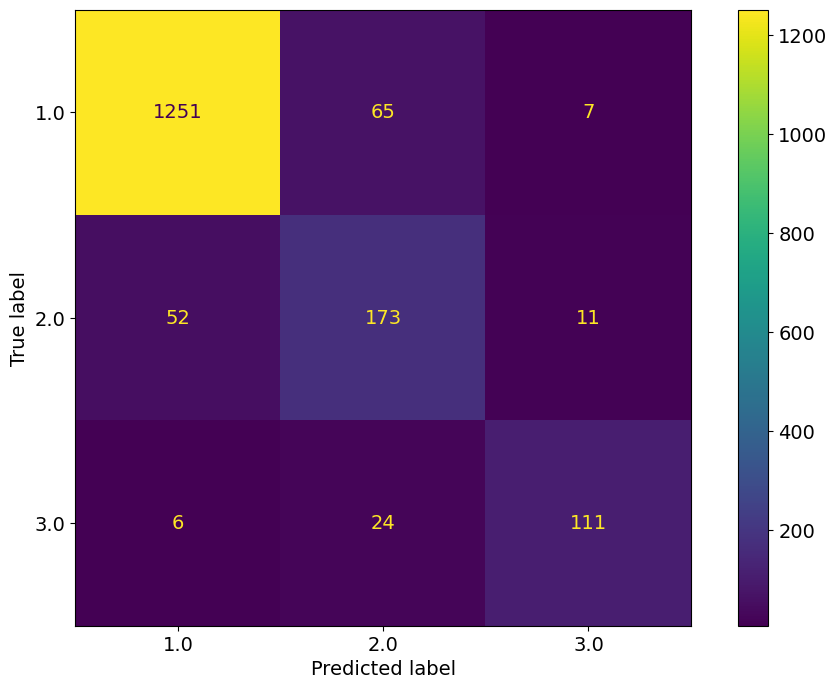

In [156]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

<b>Cardiotocography (CTG)</b> continuously records fetal heart rate obtained via an ultrasound transducer placed on the mother’s abdomen. CTG results can be used to assess wellbeing of fetus, predominantly in pregnancies with increased risk of complications.

The cleaned dataset contains data of <b>2126 fetal cardiotocograms (CTGs)</b> for processing and creating machine learning model for classifying the features measured into three classes - <b>Normal, Suspect and Pathological.</b> 

This machine learning model can be effective in identifying suspected and pathological cases that require further diagnosis and treatment.   

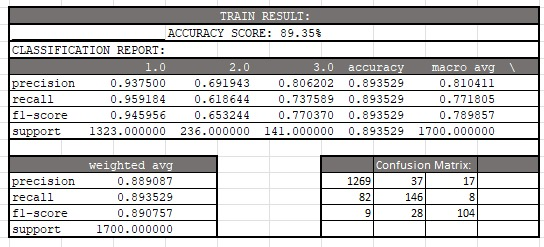
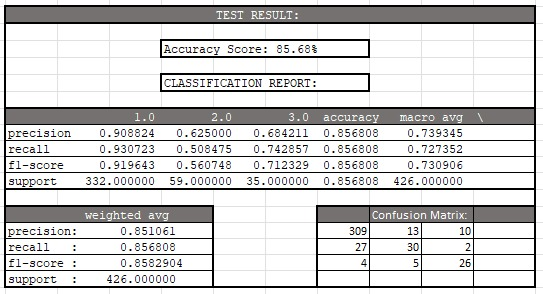

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.


The selected business problem aims to detect the fetal health and classify the pregnancy risk into the classes of low, medium and high (numerically, 1, 2 and 3 respectively).

To solve this business problem, Data is captured by a <b>CTG</b> (Cardiotocograph) used to monitor a baby's heart rate and a mother's contractions during pregnancy. CTG extracts the measurements from sensors implanted onto the patient / subject and this is taken in csv format for our project.

<b>Initially data preparation tools have been used:</b>

To remove duplicate data
To impute or remove missing data
To remove data inconsistencies

We have created an ML model using classification techniques like <b>Stratified Sampling, Support Vector Machines(SVM) and Logistic Classifier</b> and compared the performance of these models via metrics like accuracy, Confusion matrix, F1 score, recall, etc.

<b>Random Forest Classifier</b> model performs the best compared to other methods.

The results of this model help the medical expertise by classifying the fetal health into a risk range of <b>low (normal), medium(suspect cases) or high(pathological cases)</b> based on the measured input values.

Thus, it helps to monitor the fetal well-being and allows early detection of fetal distress thereby lowering the risk of maternal and fetal mortality by allowing the practitioner to prescribe suitable precautionary measures / medication.

<b><u>Challenges:</u></b>

· Identifying appropriate business problem having a social value and the right data set.
· Data preparation : Cleaning, appropriate attributes, identifying relevant features required for having correlation with the target variable.
· Selection of the best model based on comparison of accuracy values.
· Reducing the features size in the data set did not have major impact on leveraging the results.
· Heat map did not provide enough inference on inter-feature relations.
· Considerable amount of class imbalance

<b><u>Observations:</u></b>

· Data skewness – 78% in normal, 14% in suspected cases and 8% pathogenic cases thus creating class imbalance.
· Stratified sampling was done to improve class balancing and also the results.
· Since the business case is medical diagnostics, “Recall” evaluation metrics is more apt for providing relevant results. (i.e: False negatives are dangerous).

<b><u>Decisions:</u></b>

· Feature reduction – reducing the no. of features does not impact the metrics but only a slight improvement in test results.  Feature reduction was used as there was a High correlation between attributes.
· Logistic regression was used as it provides good test results over numerical attributes.